In [2]:
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Los objetivos de hoy son:**

1- **Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:**

-Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [26]:
df = pd.read_csv("/mnt/d/Descargas/Python/Modulo 2/Pair Programming 2/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df_proyecto = df[["GDP per capita", "Perceptions of corruption"]]
df_proyecto.head(3)

In [ ]:
#Crear columna nueva para poder hacer Gruop By y frecuencias

df["columna_nueva"] = df[]

In [10]:
gdp = df["GDP per capita"]
corrupcion = df["Perceptions of corruption"]

In [12]:
print(gdp.describe()) # describe muestra un resumen con los estadísticos más comunes para el dataframe 
print(gdp.cumsum()) # suma acumulada por columnas
print(gdp.mean()) # media aritmética de cada columna


count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64
0        1.340
1        2.723
2        4.211
3        5.591
4        6.987
        ...   
151    140.045
152    140.521
153    140.871
154    140.897
155    141.203
Name: GDP per capita, Length: 156, dtype: float64
0.9051474358974363


In [13]:
print(corrupcion.describe()) # describe muestra un resumen con los estadísticos más comunes para el dataframe 
print(corrupcion.cumsum()) # suma acumulada por columnas
print(corrupcion.mean()) # media aritmética de cada columna


count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64
0       0.393
1       0.803
2       1.144
3       1.262
4       1.560
        ...  
151    16.956
152    17.103
153    17.128
154    17.163
155    17.254
Name: Perceptions of corruption, Length: 156, dtype: float64
0.11060256410256411


-Percentiles 25, 75

In [14]:
percentil25gdp = np.percentile(gdp, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25gdp

0.60275

In [15]:
percentil75gdp = np.percentile(gdp, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75gdp

1.2325000000000002

In [16]:
percentil25corru = np.percentile(corrupcion, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25corru

0.047

In [17]:
percentil75corru = np.percentile(corrupcion, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75corru

0.14125

-Rango Intercualtílico

In [18]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(gdp, [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riqgdp = q3 - q1
print("El rango intercuartílico es:", riqgdp)

El rango intercuartílico es: 0.6297500000000001


In [19]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(corrupcion, [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riqcorru = q3 - q1
print("El rango intercuartílico es:", riqcorru)

El rango intercuartílico es: 0.09424999999999999


-Boxplot de algunas variables

Text(0.5, 0, 'GDP                                                                Corrupcion')

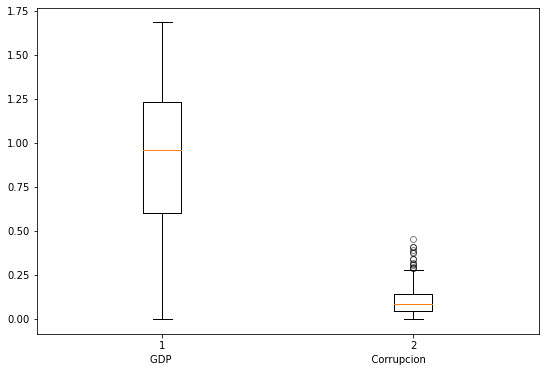

In [25]:
# Creando el objeto figura con matplotlib
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico al que añadiremos el grafico de cajas
ax = fig.add_subplot(111)

# Creando el grafico de cajas
bp = ax.boxplot(df_proyecto)

# Visualizar mas facilmente los datos atípicos
# En 'fliers' se guardan aquellos datos que se encuentran más aislados de los demás (outliers)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5) # Los dibujamos con un marcador especial

ax.set_xlabel(xlabel='GDP                                                                Corrupcion')

-Tabla de frecuencias

--Variables cualitativas

In [27]:
df.describe(include="O")

,Country or region
count,156
unique,156
top,Finland
freq,1


In [34]:
# Primero agrupamos el dataframe por la columna species.
# df_country = df.groupby("Country or region") #Devolvera un objeto DataFrameGroupBy
# print(df_country)
# Aplicamos el método agg para agregar los datos por la columa species.
frecuencias_pais = df.agg(frecuencia=("Country or region", "count")).T
# Imprimimos por pantalla el resultado de la agrupación y agregación
print(frecuencias_pais)

                   frecuencia
Country or region         156


--Variables cuantitativas

In [35]:

iris_sepal_lengths =  df.agg(frecuencia=("GDP per capita", "count"))
print(iris_sepal_lengths)

            GDP per capita
frecuencia             156


In [ ]:
iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=5)
iris_sepal = iris.groupby("sepal_length_group")
iris_sepal_lengths =  iris_sepal.agg(frecuencia=("sepal_length", "count"))
print(iris_sepal_lengths)

--Frecuencia acumulada

In [ ]:
bins = np.arange(4, 8+0.5, 0.5)

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)
iris_sepal = iris.groupby("sepal_length_group")
iris_sepal_lengths =  iris_sepal.agg(frecuencia=("sepal_length", "count"))
#Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
iris_sepal_lengths["frecuencia_acumulada"] = iris_sepal_lengths["frecuencia"].cumsum()
#Visualizamos el dataframe resultado
iris_sepal_lengths

--Representación de al menos una tabla de frecuencias

In [ ]:
plt.rcdefaults()

# Primero agrupamos el dataframe por la columna species.
iris_species = iris.groupby("species") #Devolvera un objeto DataFrameGroupBy
# Aplicamos el método agg para agregar los datos por la columa species.
frecuencias_species = iris_species.agg(frecuencia=("species", "count")) 
# Pandas nos proporciona el metodo plot.bar() para hacer un gráfico de barras de manera sencilla
frecuencias_species.plot.bar()

2. **Interpretación de los resultados.**

-Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.